# Implementing PCA on ORL Images Dataset

**Importing necessary packages**

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

**Loading the data from the dataset**

In [2]:
with h5py.File('faceimages.mat', 'r') as file:
  data = (list(file['data']))

**Solving eigenvalue problem to find projection matrix**

In [3]:
# Storing data after removing labels from last column
X = np.transpose(np.array(data[0:10304]))
# Mean centering the data
X_meaned = X - np.mean(X, axis = 0)
# Finding the covariance matrix of mean centered data
cov_mat = np.cov(X_meaned, rowvar = False)
# Finding eigen values and eigen vectors using eigh()
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
# Sorting the eigen values and eigen vectors in decreasing order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

**Plotting the 1st original image for comparison**

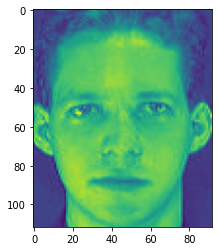

In [4]:
plt.imshow(np.transpose(X[0].reshape(92,112)))
plt.show()

**Reconstructing the image according to different principal components**

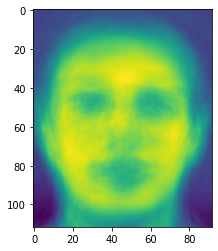

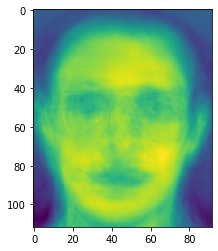

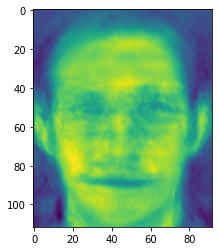

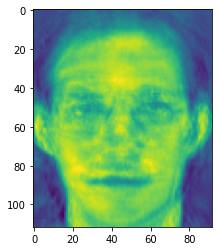

In [5]:
error= []
pc = [5, 10, 50, 100]

for num_component in pc:
  # Taking subset of sorted eigenvectors as per num_components mentioned in pc array
  eigenvector_subset = sorted_eigenvectors[:,0:num_component]
  # Obtaining reduced data after dot product of eigenvector and mean centered data
  X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
  # Reconstructing the data matrix with reduced features
  X_reconstructed = np.dot(X_reduced, eigenvector_subset.transpose()) + np.mean(X, axis = 0)
  # Plotting reconstructed image
  plt.imshow(np.transpose(X_reconstructed[0].reshape(92,112)))
  plt.show()
  # Calculating root mean squared error between original data and reconstructed data
  error.append(np.sqrt(np.sum((X - X_reconstructed)**2)/(len(X[0])*len(X))))

In [6]:
for i in range(len(pc)):
  print("Reconstruction error of images for",pc[i], "principle components:\t", round(error[i],1))

Reconstruction error of images for 5 principle components:	 28.4
Reconstruction error of images for 10 principle components:	 24.9
Reconstruction error of images for 50 principle components:	 16.9
Reconstruction error of images for 100 principle components:	 13.0


**Plotting the energy curve for top 100 features**

Text(0.5, 1.0, 'Energy curve for top 100 features')

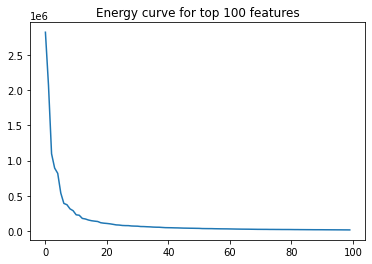

In [7]:
plt.plot(sorted_eigenvalue[0:100])
plt.title("Energy curve for top 100 features")